In [67]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from pylab import *
from scipy.optimize import curve_fit

In [68]:
f = open('data.v4.txt', 'r')
lines = f.readlines()[1:]
f.close()
x = []
y = []
ery = []

In [69]:
for line in lines:
    a = line.split()
    x.append(float(a[0]))
    y.append(float(a[1]))
    ery.append(float(a[2]))


In [70]:
x1 = np.array(x)
y1 = np.array(y)
ery1 = np.array(ery)
y0 = y1[0]

In [71]:
def func(x, a, n, y0):
    return a * x**(n) + y0

In [82]:
popt, pcov = curve_fit(func, x1, y1)
plt.plot(x1, func(x1, *popt), 'r-', label='fit')

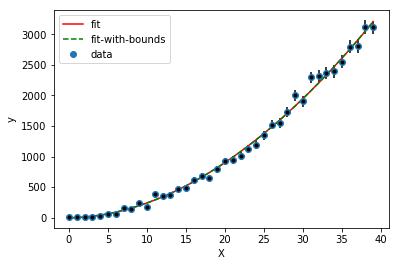

In [83]:
#x,a,n,y0
popt, pcov = curve_fit(func, x1, y1, bounds=(0, [50., 10., 10.]))
plot(x1, func(x1, *popt), 'g--', label='fit-with-bounds')
plot(x1, y1, linestyle="",marker="o",label='data')
errorbar(x1, y1, yerr=ery1, fmt='k.')
xlabel('X')
ylabel('y')
plt.legend()
plt.show()


In [89]:
print 'a=',popt
print 'n=',popt[1]
print 'y0=',y0

a= [-0.03136829  0.00283747  0.99217549]
n= 1.90087076096
y0= 4.39858


In [79]:
y = func(x, a, n, y0)
y

NameError: name 'n' is not defined

In [85]:
print popt

[  3.03382736e+00   1.90087076e+00   2.11440565e-10]


In [87]:
print pcov

[[  3.47931784e-01  -3.13682873e-02  -1.13946409e+01]
 [ -3.13682873e-02   2.83747424e-03   9.92175490e-01]
 [ -1.13946409e+01   9.92175490e-01   6.25837601e+02]]
